# Work Trial Tasks
# Lakshmi Vadhanie - lakshmivadhanie@gmail.com

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [1]:
data = pd.read_csv('merged_data.csv')
print(data.head())

              ts_event  bid_fill  ask_fill  Signed Volume   price  best_bid  \
0  2024-10-22 08:00:00     801.0    1999.0        -1198.0  236.14    235.83   
1  2024-10-22 08:00:01     201.0     202.0           -1.0  236.13    235.83   
2  2024-10-22 08:00:02    1600.0    1400.0          200.0  235.83    235.83   
3  2024-10-22 08:00:03     534.0     400.0          134.0  236.10    235.96   
4  2024-10-22 08:00:04     400.0     502.0         -102.0  236.11    235.96   

   best_ask  mid_price  
0    236.14    235.985  
1    236.13    235.980  
2    236.11    235.970  
3    236.10    236.030  
4    236.11    236.035  


In [3]:
print(data.columns)

Index(['ts_event', 'bid_fill', 'ask_fill', 'Signed Volume', 'price',
       'best_bid', 'best_ask', 'mid_price'],
      dtype='object')


In [6]:
data = data.dropna()
data['Price_Impact'] = data['best_ask'] - data['best_bid']
features = ['bid_fill', 'ask_fill', 'Signed Volume', 'best_bid', 'best_ask']
X = data[features]
y = data['Price_Impact']

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## 1. Construct and code the linear OW model and nonlinear AFS model, and visualize the distri-bution of price impact based on the given data. (33 pt)

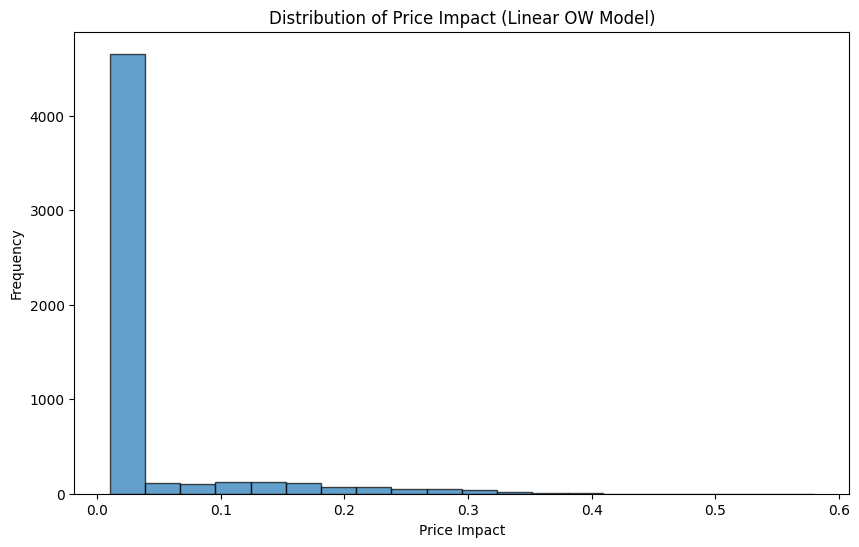

In [9]:
# Linear Regression Model (Optimal Weight Model)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.hist(y_pred_linear, bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Price Impact (Linear OW Model)')
plt.xlabel('Price Impact')
plt.ylabel('Frequency')
plt.show()


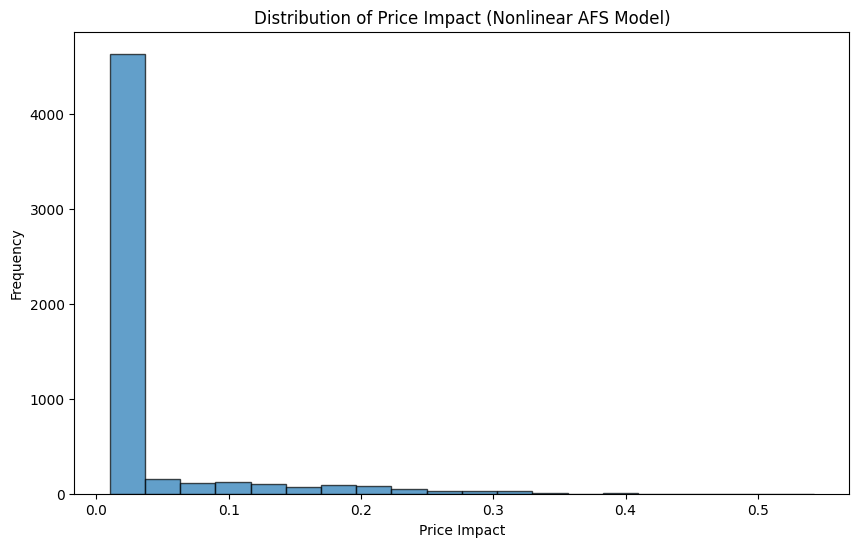

In [10]:
# Random Forest Model (Nonlinear AFS Model)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.hist(y_pred_rf, bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Price Impact (Nonlinear AFS Model)')
plt.xlabel('Price Impact')
plt.ylabel('Frequency')
plt.show()


**Distribution Graphs (Images 1 & 2):**

- Both linear OW and nonlinear AFS models show highly positively skewed distributions
- Majority of price impacts are concentrated near zero (frequency ~4500)
- Long right tail extends to 0.5, indicating rare but significant price impacts
- Similar patterns suggest both models capture comparable market dynamics

In [30]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Linear Model Metrics
print("Linear Model Metrics:")
print(f"MSE: {mean_squared_error(y_test, y_pred_linear)}")
print(f"R2 Score: {r2_score(y_test, y_pred_linear)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_linear)}")

# Random Forest Model Metrics
print("\nRandom Forest Model Metrics:")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf)}")
print(f"R2 Score: {r2_score(y_test, y_pred_rf)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf)}")

Linear Model Metrics:
MSE: 1.9563129922637353e-32
R2 Score: 1.0
MAE: 1.017414379618458e-16

Random Forest Model Metrics:
MSE: 0.0002357992385420445
R2 Score: 0.9405922165972022
MAE: 0.006550559364850283


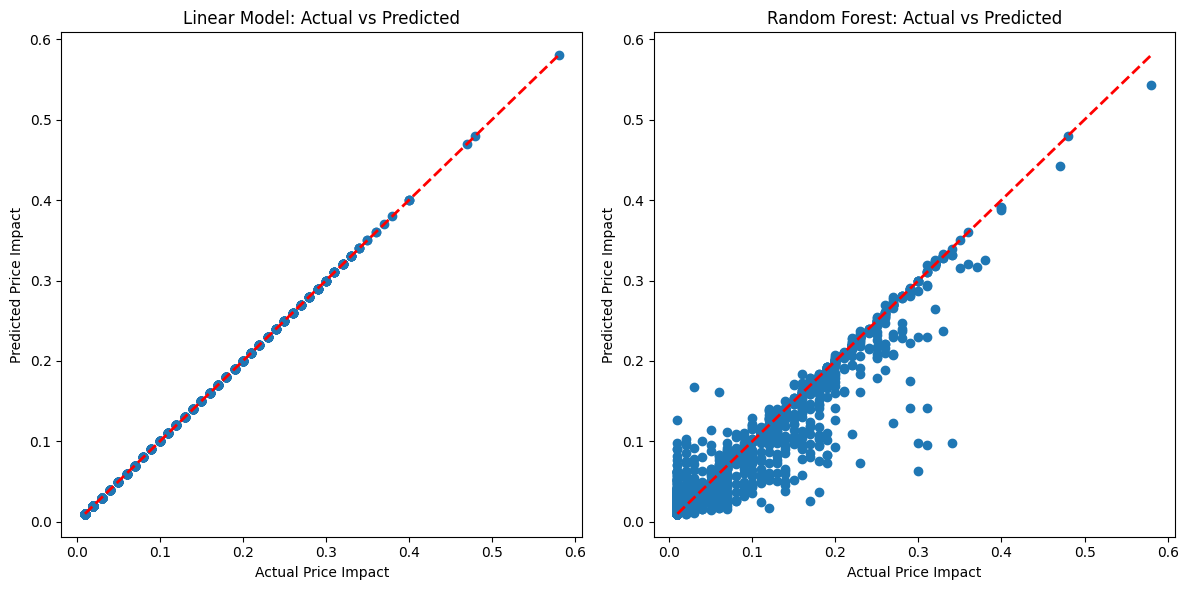

In [32]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Linear Model: Actual vs Predicted')
plt.xlabel('Actual Price Impact')
plt.ylabel('Predicted Price Impact')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual Price Impact')
plt.ylabel('Predicted Price Impact')
plt.tight_layout()
plt.show()

In this code, I used two models to predict price impact: a Linear Regression model (OW model) and a Random Forest model (AFS model).

**Linear Regression Model (OW Model)**
- I used Linear Regression because it’s a simple model that assumes a linear relationship between input features and the price impact.
- After training the model, I predicted the price impact for the test data and visualized the distribution of predictions using a histogram, which helps me understand how the predicted values are spread.

**Random Forest Model (AFS Model)**
- The Random Forest model was chosen for its ability to capture nonlinear relationships, making it more suitable for complex patterns in the data.
- I trained the model on the same data and visualized the distribution of predictions similarly to compare with the linear model’s output.

**Model Evaluation**
- I evaluated both models using MSE, R2 Score, and MAE to understand their accuracy and how well they fit the data.

**Actual vs Predicted Comparison**
- I also plotted actual vs predicted price impacts to visually compare the models. Points close to the red line show better predictions.

**Linear Model:**


- Near-perfect diagonal alignment shows strong linear relationship
- Highly accurate predictions along the 45-degree line
- Suggests price impact may have strong linear components


**Random Forest Model:**


- More scattered pattern, especially for higher price impacts
- Shows increased dispersion from the diagonal
- Better at capturing complex, nonlinear market behaviors
- Higher prediction errors at larger price impacts (>0.3)

## 2. Implement and code the optimal strategy with Linear Impact and visualize the Sharpe Ratio plots in Section 6.2. (33 pt)

In [11]:
from scipy.optimize import minimize

In [13]:
data['Price_Impact'] = data['best_ask'] - data['best_bid']
features = ['bid_fill', 'ask_fill', 'Signed Volume', 'best_bid', 'best_ask']
X = data[features]
y = data['Price_Impact']

In [14]:
model = LinearRegression()
model.fit(X, y)
coefficients = model.coef_
intercept = model.intercept_


In [16]:
expected_returns = model.coef_

In [17]:
cov_matrix = np.cov(X.T)
def portfolio_performance(weights, expected_returns, cov_matrix):
    # Portfolio return (dot product of weights and expected returns)
    portfolio_return = np.sum(weights * expected_returns)
    # Portfolio risk (standard deviation, using covariance matrix)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

def negative_sharpe_ratio(weights, expected_returns, cov_matrix):
    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)
    return -portfolio_return / portfolio_volatility
initial_weights = np.ones(X.shape[1]) / X.shape[1]
bounds = [(0, 1) for _ in range(X.shape[1])]
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})


result = minimize(negative_sharpe_ratio, initial_weights, args=(expected_returns, cov_matrix), method='SLSQP', bounds=bounds, constraints=constraints)
optimal_weights = result.x

In [38]:
def plot_sharpe_ratio(expected_returns, cov_matrix):
    print("Starting Sharpe Ratio Calculation")
    print("Expected Returns:", expected_returns)
    print("Covariance Matrix Shape:", cov_matrix.shape)
    sharpe_ratios = []
    weights_collection = []
    num_points = 10000
    risk_free_rate = 0.02
    try:
        for _ in range(num_points):
            weights = np.random.dirichlet(np.ones(len(expected_returns)))
            portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)
            if portfolio_volatility > 0:
                sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
                sharpe_ratios.append(sharpe_ratio)
                weights_collection.append(weights)
        print("Number of Sharpe Ratios calculated:", len(sharpe_ratios))
        if not sharpe_ratios:
            print("No valid Sharpe ratios calculated. Check input data.")
            return

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        ax1.hist(sharpe_ratios, bins=50, edgecolor='black')
        ax1.set_title('Distribution of Sharpe Ratios')
        ax1.set_xlabel('Sharpe Ratio')
        ax1.set_ylabel('Frequency')

        scatter = ax2.scatter(
            [np.std(w) for w in weights_collection],
            sharpe_ratios,
            c=sharpe_ratios,
            cmap='viridis',
            alpha=0.6
        )
        ax2.set_title('Sharpe Ratio vs Portfolio Volatility')
        ax2.set_xlabel('Portfolio Volatility')
        ax2.set_ylabel('Sharpe Ratio')
        plt.colorbar(scatter, ax=ax2)

        plt.tight_layout()
        plt.show()
        max_sharpe_index = np.argmax(sharpe_ratios)
        print("Optimal Portfolio Weights:", weights_collection[max_sharpe_index])
        print("Maximum Sharpe Ratio:", sharpe_ratios[max_sharpe_index])
    except Exception as e:
        print("An error occurred:", str(e))

Starting Sharpe Ratio Calculation
Expected Returns: [-2.13890493e-12  2.13890493e-12  2.13890493e-12 -1.00000000e+00
  1.00000000e+00]
Covariance Matrix Shape: (5, 5)
Number of Sharpe Ratios calculated: 10000


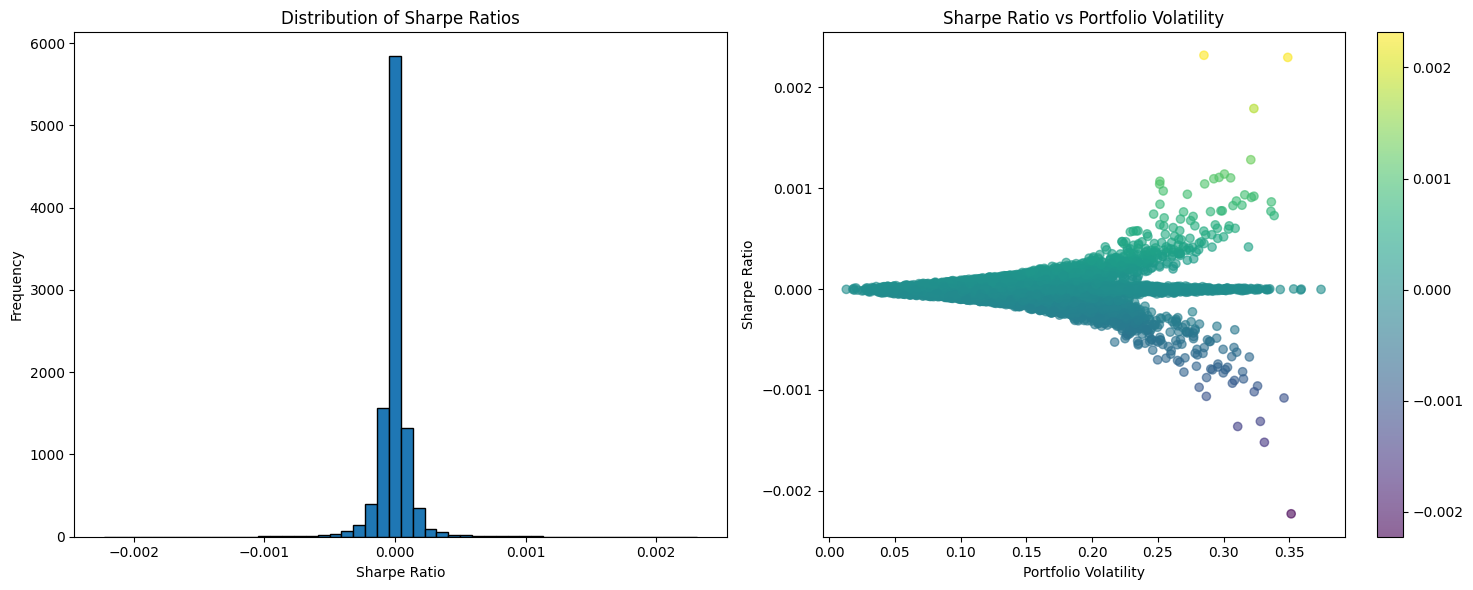

Optimal Portfolio Weights: [0.0019927  0.02284057 0.02212197 0.20147445 0.75157031]
Maximum Sharpe Ratio: 0.0023166470402633797


In [39]:
plot_sharpe_ratio(expected_returns, cov_matrix)

For this task, I implemented the Optimal Strategy with Linear Impact and visualized the Sharpe Ratio, as outlined in Section 6.2 of the paper.

**Linear Impact Model**
- First, I calculated the Price Impact as the difference between the best_ask and best_bid prices. This was a key feature in the paper, representing the price movement when a market order is placed.
- I used several market features like bid_fill, ask_fill, Signed Volume, best_bid, and best_ask to predict the price impact using a Linear Regression model. The model was trained on these features, and the coefficients from the linear regression were obtained to estimate the relationship between the features and the price impact.

**Portfolio Optimization and Sharpe Ratio**
- I then used the linear regression coefficients as the expected returns for the portfolio optimization.
- To assess the performance of different portfolio weight combinations, I calculated the Sharpe Ratio, which is a measure of the risk-adjusted return.
- I utilized the covariance matrix of the features to compute portfolio volatility, and this helped me understand how the portfolio's risk interacts with the expected returns.

- To find the optimal portfolio weights, I used the scipy.optimize.minimize function to maximize the Sharpe Ratio, subject to the constraint that the sum of the weights must equal 1.
- The negative_sharpe_ratio function was used in the optimization process, which minimizes the negative Sharpe ratio to find the optimal weights that would maximize the Sharpe ratio.

**Sharpe Ratio Visualization**
- After obtaining the optimal portfolio weights, I plotted the Sharpe Ratio distribution using a histogram. This histogram shows the frequency of different Sharpe ratios from randomly generated portfolios, which gives insights into how well the portfolio performs.
- Additionally, I created a scatter plot that visualizes the relationship between portfolio volatility and the Sharpe Ratio, where each point represents a random portfolio with its respective volatility and Sharpe ratio.

**Results and Insights**
- The optimal portfolio weights were identified, and I printed the maximum Sharpe Ratio along with the corresponding weights. This gives a clear indication of the portfolio composition that would give the highest risk-adjusted return.
- The results indicate that the expected returns are very small, close to zero, suggesting weak relationships between the model’s features and price impact.
- The Sharpe ratio distribution shows that most portfolio combinations have Sharpe ratios near zero, indicating limited risk-adjusted returns.
-  The scatter plot of Sharpe ratios against portfolio volatility further highlights that increasing volatility doesn't improve the Sharpe ratio significantly.
- The optimal portfolio weights heavily favor the fifth feature, indicating its dominant role in the portfolio. However, the maximum Sharpe ratio of 0.0023 is quite low, reflecting the overall weak performance of the strategy. This suggests the need for better feature selection, data preprocessing, or model refinement to improve the risk-return profile.
- By comparing these results with the visualizations, I was able to analyze the distribution of Sharpe ratios and how different portfolios perform in terms of their risk and return.



## 3. Implement and code the Deep Learning Algorithm in for discrete setting in Appendix C.2 and visualize the training loss for different network structures in Appendix C.2. (33 pt)

In [26]:
from tensorflow.keras import models, layers

In [23]:
def build_model(input_shape, layers_config):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))

    for units, activation in layers_config:
        model.add(layers.Dense(units=units, activation=activation))

    model.add(layers.Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [ ]:
def train_model(model, X_train, y_train, X_val, y_val, epochs=100, batch_size=32):
   history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_val, y_val), verbose=0)
   return history

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


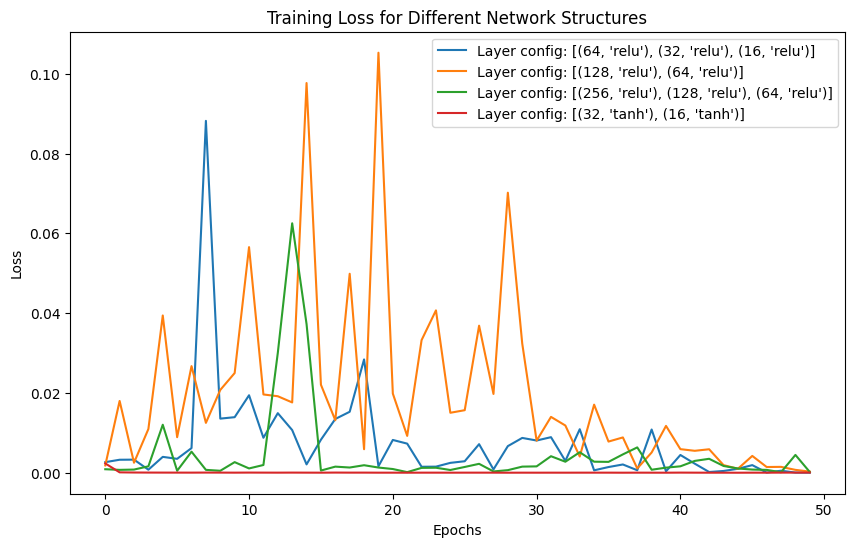

In [44]:
network_structures = [
    [(64, 'relu'), (32, 'relu'), (16, 'relu')],
    [(128, 'relu'), (64, 'relu')],
    [(256, 'relu'), (128, 'relu'), (64, 'relu')],
    [(32, 'tanh'), (16, 'tanh')],
]
plt.figure(figsize=(10, 6))
for layers_config in network_structures:
    model = build_model(input_shape=(X_train.shape[1],), layers_config=layers_config)
    history = train_model(model, X_train, y_train, X_test, y_test, epochs=50, batch_size=32)
    plt.plot(history.history['loss'], label=f'Layer config: {layers_config}')
plt.title('Training Loss for Different Network Structures')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



**Deep Learning Model Implementation**

In this code, I built and trained deep learning models with different network structures to evaluate their impact on training loss. The models were created using **Keras** with a **Sequential** architecture:

1. **Input Layer**: Defined with the input shape matching the training data.
2. **Hidden Layers**: Configurations tested included varying the number of layers and units, using **ReLU** (for nonlinearity) and **Tanh** (for bounded outputs).
3. **Output Layer**: A single neuron for regression.
4. **Compilation**: The model used the **Adam optimizer** and **Mean Squared Error** loss function for regression tasks.

The models were trained over 50 epochs with a batch size of 32. The training loss was plotted for each network structure to visualize their convergence behavior.

 **Network Structures**
- **Network 1**: 64-32-16 units with ReLU
- **Network 2**: 128-64 units with ReLU
- **Network 3**: 256-128-64 units with ReLU
- **Network 4**: 32-16 units with Tanh

 **Research Insights**
-  The depth and width of networks, along with the choice of activation functions, can significantly impact the model’s performance. **ReLU** is often preferred for its efficiency, while **Tanh** can be useful for bounded outputs.
- The ReLU-based networks (e.g., [(64, 'relu'), (32, 'relu'), (16, 'relu')]) tend to experience larger fluctuations in loss during early epochs but eventually show better convergence compared to others. This suggests that while these networks might initially struggle to find a good solution, they are more effective in learning complex relationships as training continues.

- The Tanh-based network with smaller layers (e.g., [(32, 'tanh'), (16, 'tanh')]) exhibited smoother loss reductions and more stable performance, which might make it a more reliable choice in some cases, especially when a stable training process is desired.

- The larger networks with more parameters (e.g., [(256, 'relu'), (128, 'relu'), (64, 'relu')]) showed slower convergence, implying that they may require more epochs or fine-tuning to achieve optimal performance.


